<a href="https://colab.research.google.com/github/JeremyRam10/Software-Tech-1-Capstone-Project/blob/Google-Collab/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing the canvas with tools and functions needed to work with the dataset.

In [ ]:
# Connect my google drive so I can access files

from google.colab import drive
drive.mount('/content/drive')

# Navigate to 'Software Tech 1 - Capstone' folder
%cd /content/drive/MyDrive/Software Tech 1 - Capstone


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Software Tech 1 - Capstone


In [ ]:
!pip install streamlit
!pip install pandas
!pip install -U scikit-learn
!pip install seaborn


In [ ]:
import streamlit as st  # Import Streamlit for creating the web app
import pandas as pd  # Import pandas for data manipulation
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns



In [ ]:
# Define functions to plot graphs using matplot and seaborn
def plot_histogram(data, column, bins=30, title="Histogram", xlabel="Value", ylabel="Frequency"):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=bins, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    st.pyplot(plt)  # Display the plot


def plot_bar_chart(data, column, title="Bar Chart", xlabel="Categories", ylabel="Frequency"):
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)  # Keeps the category labels horizontal
    st.pyplot(plt)  # Display the plot


def plot_box(data, column, title="Box Plot", xlabel="", ylabel=""):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    st.pyplot(plt)

def plot_scatter(x_data, y_data, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, alpha=0.5)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(title)
    plt.grid(True)
    plt.show()


# define function to remove outliers based on Inter Quartile Range
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers and return the cleaned dataframe
    cleaned_df = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_df


In [ ]:
# Define function to check for missing values
def check_missing_values(empty_value):
    # Check for missing values in the dataset
    missing_values = empty_value.isnull().sum()

    # Check if there are any missing values
    if missing_values.sum() == 0:
        status = "No missing values found in the dataset."
    else:
        status = "Missing values found in the dataset."

    return status

# Step 1: Reading the Dataset

### Importing the correct dataset and displaying as a table.

In [ ]:
# Read the dataset
clean_dataset = pd.read_csv('Clean_Dataset.csv', sep=',')

In [ ]:
clean_dataset.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


## Key Observations


*   The dataset contains >300 000 lines of flight details.
*   There are 12 attributes within the dataset as outlined below:
  * Unnamed: 0 - Provides a count of lines.
  * Airline - Identifies which airline operates each flight.
  * Flight Number - Provides the specific flight number.
  * Source_city - Where the flight begins.
  * Departure_time - Which portion of the day it is when the flight departs.
  * Stops - How many stops the flight makes before reaching it's destination.
  * Arrival_time - Which portion of the day it is when the flight arrives.
  * Destiantion_city - Where the flight lands.
  * Class - Whether the flight is 'Business' or 'Economy'.
  * Duration - Time in hours (h) of flight.
  * Days_left - How many days remain before flight's departure date.
  * Price - The total cost of the flight.

# Step 2: Problem Statement and Definition

## Flight Price Analysis

### Introduction
This app provides an analysis of the flight booking dataset obtained from the “Ease My Trip” website to predict the best time to purchase flights. The data attributes include airline, class, destination and time of year.





# Step 3: Target Variable Definition

### **Target Variable:** Price

The analysis aims to identify factors influencing flight prices. The "Price" variable has been identified as the target variable for this project. This variable represents the total cost of the flight and will be the focus of prediction efforts.

By analyzing the relationship between the "Price" and other features in the dataset, such as "Days_left" (time remaining before departure), we can potentially develop a model to predict flight prices based on various contributing factors.


# Step 4: Visualising the distribution of Target variable

In this section, we will explore the distribution of the target variable, "Price".

<Axes: >

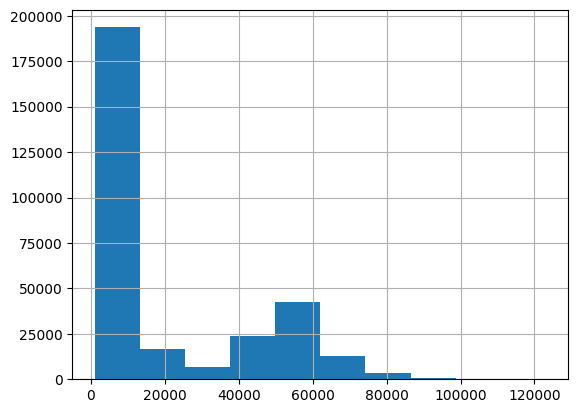

In [ ]:
%matplotlib inline

clean_dataset['price'].hist()

## Key Observations


While a bell curve is ideal, this chart shows prices are skewed to the left, meaning most flights are on the less expensive end.

Further analysis will be done to identify outliers and which other variables may be causing this skew.



# Step 5: Data exploration at basic level

## Data Overview

Understanding which datatypes we are working with in the dataset is imoprtant. Here we will have the program print these datatypes.

In [ ]:
# Get data types for all features
data_types = clean_dataset.dtypes

# Print data types
print(data_types)

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


This simple exploration reveals a mix of data types within the provided dataset. While key features like 'duration', 'days_left', and 'price' are numerical, other variables like 'airline' and 'destination_city' are stored as text data.

Categorical features like 'class' and potentially 'stops' will also require careful handling during analysis.

In [ ]:
# Generate sample rows of the data
clean_dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Generate Sample rows of data
clean_dataset.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
# Gather basic information about data set
# understand coloumns, count of rows, number of empty rows and data types
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# Generate descriptive statistics for all coloumns in data set regardless of datatype

clean_dataset.describe(include="all")

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [ ]:
# Find unique values to determine whether variable is categorical or continous

clean_dataset.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

## Key Observations


* 'Unnamed: 0' is a useless column
* 'flight' is a useless column
* Coloumn Characteristics:
  *   Unnamed:0 - Indexing.
  *   Airline - Categorical.
  * Flight - Categorical but limited.
  * Source_city - Categorical.
  * Departue_time - Categorical.
  * Stops - Categorical.
  * Arrival_time - Categorical.
  * Destination_city - Categorical.
  * Class - Categorical.
  * Duration - Continuous.
  * Days_left - Discrete.
  * Price - Continous, multiple unique values but within a range.



# Step 6: Identifying and Rejecting useless columns

This is our first step in 'cleaning' the data. First we will re-confirm which variables are found in the data and decide which are irrelevant to our project.

In [ ]:
# Printing the coloumns found in the data

print(clean_dataset.columns)

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


Now we have confirmed, we have identified the useless coloumns ('Unnamed: 0' and 'flight') we can remove them from the dataset.

As we continue our analysis we may find more coloumns which are unneeded.

In [ ]:
clean_dataset = clean_dataset.drop(['Unnamed: 0', 'flight', 'duration'], axis=1)  # Remove the unneeded columns

clean_dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


# Step 7: Visual Exploratory Data Analysis of data

This section looks deeper into the flight data using visualization techniques to explore relationships between other features of the dataset and the target variable ("price"). This exploration aims to identify trends, patterns, and potential outliers that might influence flight prices.

Our first step in visually exploring this data is to create historgrams for the data. We will begin by confirming our price distribution.

2024-05-03 05:59:09.195 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


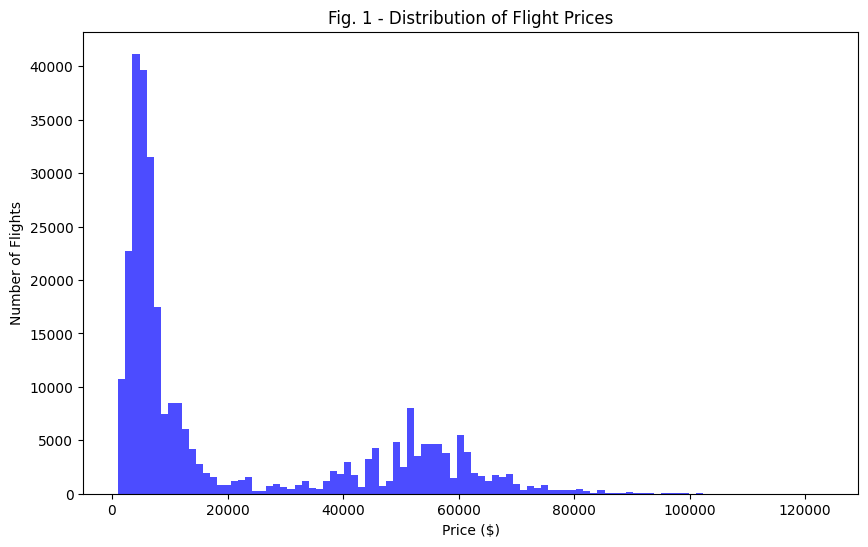

In [ ]:
%matplotlib inline

plot_histogram(clean_dataset, 'price', bins=100, title="Fig. 1 - Distribution of Flight Prices", xlabel="Price ($)", ylabel="Number of Flights")

As confirmed previously, we can see a skew to the left of prices. We will now investigate whether this is due to on of our other variables, such as 'days_left'.

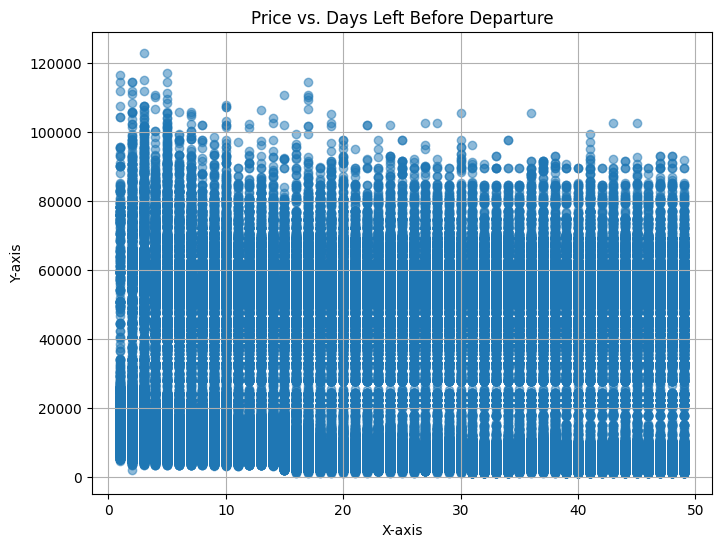

In [ ]:
plot_scatter(clean_dataset["days_left"], clean_dataset["price"], "Price vs. Days Left Before Departure")

The scatter plot analysing 'Days Left' against 'Price' shows a somewhat clean distribution. This leaves us with the 'class' variable.

We will split the dataset based on class and investigate.

In [ ]:
# Filter rows where the 'Class' column contains the word "economy"
economy_data = clean_dataset[clean_dataset['class'].str.contains('economy', case=False, na=False)]
# Filter rows where the 'Class' column contains the word "business"
business_data = clean_dataset[clean_dataset['class'].str.contains('business', case=False, na=False)]

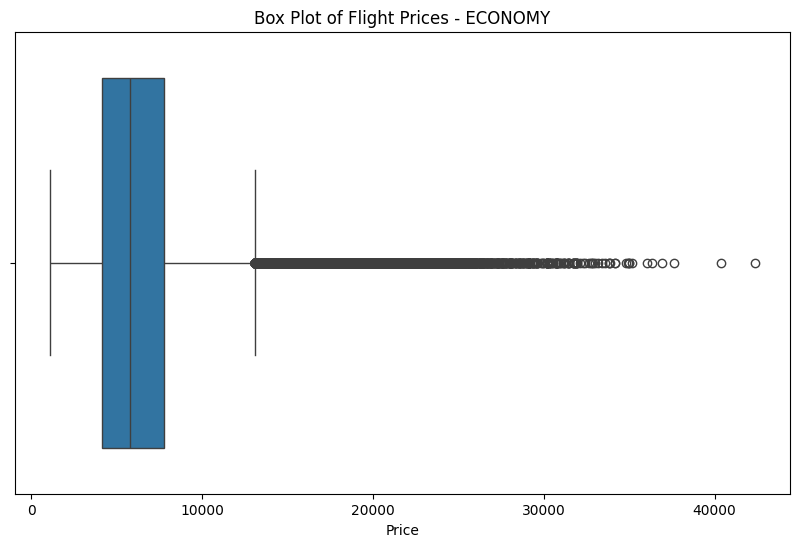

In [ ]:
%matplotlib inline

plot_box(economy_data, 'price', title="Box Plot of Flight Prices - ECONOMY", xlabel="Price")

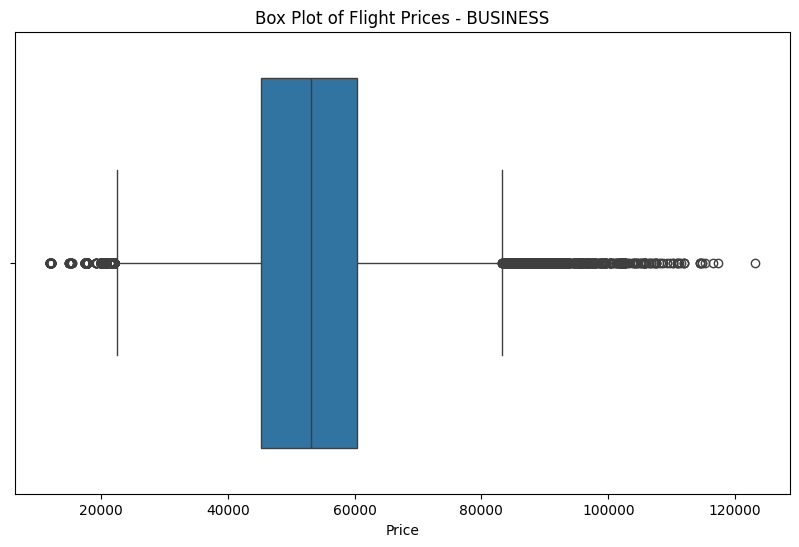

In [ ]:
%matplotlib inline

plot_box(business_data, 'price', title="Box Plot of Flight Prices - BUSINESS", xlabel="Price")

### Key Observations


*   Analysing 'Price' against 'Days left' shows a somewhat clean distribution.
*   Splitting the dataset based on 'class' confirms assumption of 'business' flights generally being more expensive.
* Continuing to treat the dataset as two, based on class will be beneficial for future analysis.


# Step 8: Feature Selection based on data distribution

This section focuses on selecting the most relevant features from the flight data for predicting flight prices.

**Figure 1** shows that the flight price distribution exhibits a positive skew,indicating a concentration of flights towards the lower end of the price spectrum. This also identifies outliers in the dataset, representing the most expensive flights.

**Figure 2** provides an analysis of flights with multiple stops. Here we can see that most flights contain one (1) stop-over.

**Figure 3** plots the distribution flights available against the number of days until takeoff. We can see that there are a similar amount of available flights for days 10 - 50, but this quickly drops as we approach one day remaining.

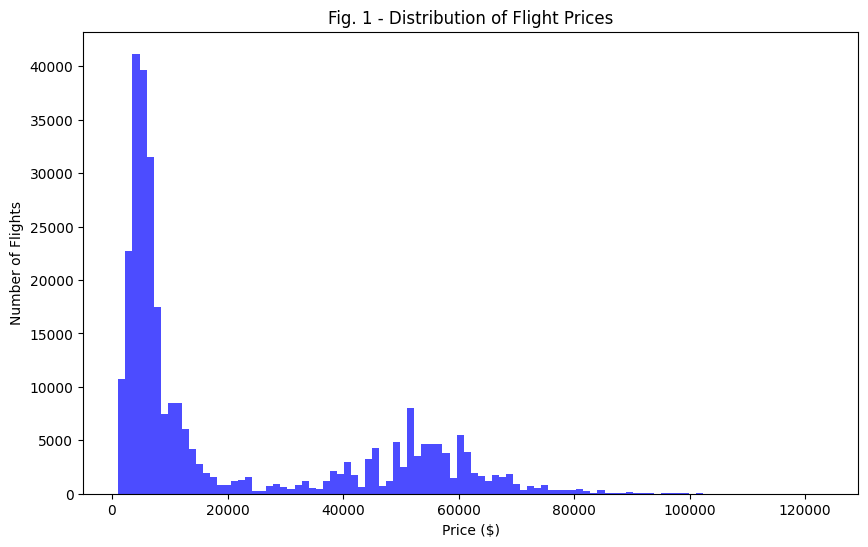

In [ ]:
%matplotlib inline

plot_histogram(clean_dataset, 'price', bins=100, title="Fig. 1 - Distribution of Flight Prices", xlabel="Price ($)", ylabel="Number of Flights")

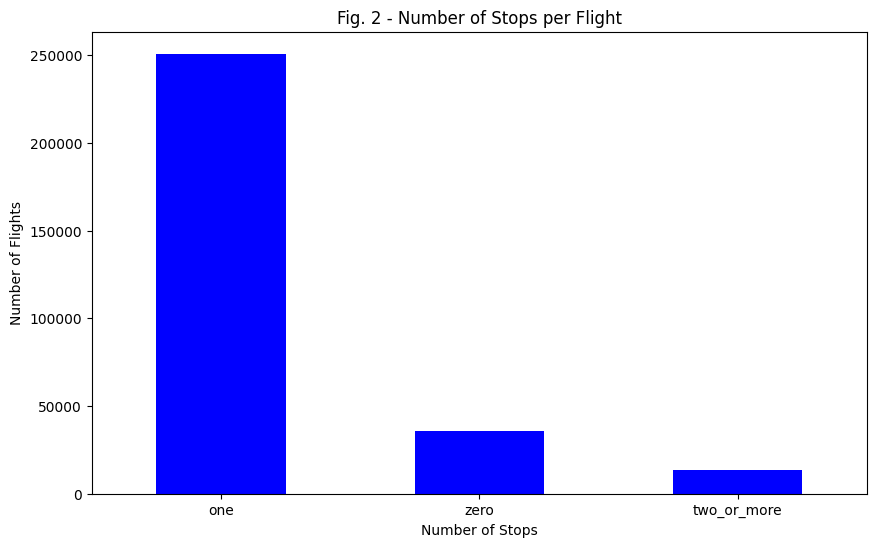

In [ ]:
%matplotlib inline
plot_bar_chart(clean_dataset, 'stops', title="Fig. 2 - Number of Stops per Flight", xlabel="Number of Stops", ylabel="Number of Flights")

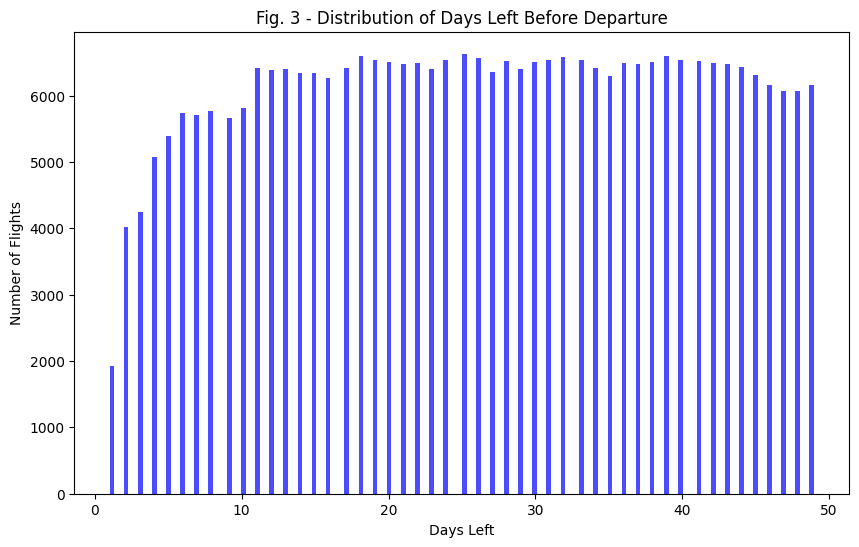

In [ ]:
%matplotlib inline
plot_histogram(clean_dataset, 'days_left', bins=150, title="Fig. 3 - Distribution of Days Left Before Departure", xlabel="Days Left", ylabel="Number of Flights")

# Step 9: Removal of outliers and missing values

As found in step 7, our dataset contains outliers. We will now remove these outliers and confirm out remaining data does not contain any missing values. Failing to do both of these steps will negatively impact the performace of our machine learning model.

In [ ]:
# Remove outliers found through box plots
economy_data_clean = remove_outliers(economy_data, 'price')
business_data_clean = remove_outliers(business_data, 'price')

In [ ]:
# Confirm no missing values are found in the dataset

economy_data_check = check_missing_values(economy_data_clean)
business_data_check = check_missing_values(business_data_clean)

print("Missing Value Status: \n Economy Data -", economy_data_check, "\n Business Data -", business_data_check)

Missing Value Status: 
 Economy Data - No missing values found in the dataset. 
 Business Data - No missing values found in the dataset.


# Step 10: Visual and Statistic Correlation analysis for selection of best features

As 'class' has already been identified, we will look for correlations between other numerical variables. As mentioned earlier, we will treat this as two seperate datasets, 'economy' and 'business'.

In [ ]:
# Create a correlation matrix for our ECONOMY dataset
correlation_matrix = economy_data.select_dtypes(include=['int64', 'float64']).corr()
display(correlation_matrix)

,days_left,price
days_left,1.000000,-0.559551
price,-0.559551,1.000000


In [ ]:
# Create a correlation matrix for our BUSINESS dataset
correlation_matrix = business_data.select_dtypes(include=['int64', 'float64']).corr()
display(correlation_matrix)

,days_left,price
days_left,1.000000,-0.091289
price,-0.091289,1.000000


This correlation matrix shows as negative correlation between 'days_left' and 'price' in both instances. This is as expected as we are measuring the price **increase** as the days left **decreases**.

For our economy dataset we see a moderate negative correlation indicating in Economy class flights, prices tend to increase more significantly as departure approaches (days left decrease).

For our business dataset we see the absolute value (very close to 0) suggests that "days_left" has little influence on Business class flight prices in your data.

This shows that the relationship between 'price' and 'days_left' is only significant for economy flights and will need to be considered as this project continues.

# Step 11: Data Conversion to numeric values for machine learning/predictive analysis

As machine learning algorithms  work best with numerical dataneed to convert the categorical variables in the dataset into numerical representations suitable for a price prediction model.

Since our datasets have been 'cleaned' we will first combine them. This will allow us to operate with one large dataset, assisting with ease in future steps.

In [ ]:
# Combining data sets

combined_clean = pd.concat([economy_data_clean, business_data_clean], ignore_index=True)

combined_clean.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [ ]:
# Now we will encode the data using a Label Encoding Method.

from sklearn.preprocessing import LabelEncoder

categorical_features = ["stops", "airline", "source_city", "departure_time", "arrival_time", "destination_city", "class"]

label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    combined_clean[col] = label_encoders[col].fit_transform(combined_clean[col])

combined_clean.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,4,2,2,2,5,5,1,1,5953
1,4,2,1,2,4,5,1,1,5953
2,0,2,1,2,1,5,1,1,5956
3,5,2,4,2,0,5,1,1,5955
4,5,2,4,2,4,5,1,1,5955


# Step 12: Training/Testing Sampling and K-fold cross validation

In [ ]:
from sklearn.model_selection import train_test_split

X = combined_clean.drop('price', axis=1)  # Features (predictors)
y = combined_clean['price']           # Target variable

# Split data into training and testing sets (test_size=0.3 means 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
0,4,2,2,2,5,5,1,1
1,4,2,1,2,4,5,1,1
2,0,2,1,2,1,5,1,1
3,5,2,4,2,0,5,1,1
4,5,2,4,2,4,5,1,1


In [ ]:
from sklearn.model_selection import KFold

# Define the number of data folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 13: Investigating multiple Regression algorithms

The chosen models for investigation are the Linear Model and the Random Forest Regressor model. Each of these will be assessed on their MSE and R-squared Values.

Mean Squared Error (MSE): Lower MSE indicates better performance.
R-squared: Represents the proportion of variance in the target variable (flight prices) explained by the model. A value closer to 1 indicates a better fit.

In [ ]:
# Use the KFold object within a model training loop (RandomForestRegressor)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define hyperparameters (optional)
n_estimators = 100  # Number of decision trees
max_depth = 5  # Maximum depth of each tree

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [ ]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest MSE:", mse)
print("Random Forest R-squared:", r2)

Random Forest MSE: 23880507.43053103
Random Forest R-squared: 0.9544741832491778


In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression


# Model training and evaluation
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression R-squared:", r2_linear)
print("Linear Regression MSE:", mse_linear)

Linear Regression R-squared: 0.9282698917692331
Linear Regression MSE: 37625934.13695724


### Key Findings:

*   Random Forest has a lower MSE, indicating a lower average prediction error.
*   The difference in R-squared values is relatively small (0.9545 vs 0.9332).



# Step 14: Selection of the best Model

I evaluated two regression algorithms for predicting flight prices, Random Forest and Linear Regression. Mean Squared Error (MSE) and R-squared were used as the primary evaluation metrics.

As shown in step 13, random Forest achieved the lowest MSE, indicating the best average prediction accuracy. While Linear Regression offered good interpretability, its MSE was higher. I've opted to continue with Random Forest due to its superior accuracy for this specific task where interpretability is not a critical requirement.

# Step 15: Deployment of the best model in production

In this step we are preparing the model to be exported into another environment where it can be passed data to output predictions.

To do this we need to are importing the pickle module which will package the trained and tested ML algorithm.

Pickle is a serialization technique used for storing and retrieving  objects, including machine learning models. This doesn't provide the functionalities of a full-fledged API, however does suit our purpose for this project.

In [ ]:
# prompt: package model using pickle

import pickle

# Save the trained model to a file
with open('flight_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)


# Step 16: GUI/WEB Deployment using either tkinter/Flask/Streamlit

PLEASE NOTE THIS CODING SECTION MUST BE RUN OUTSIDE OF GOOLGE COLLAB.

This section provides the code required to run this model as a webapp using Streamlit. Remember:



*   This will not work within Google Colab.
* A user will need to use PyCharm to run this code.
* Make sure you include the data file (Clean_Dataset.csv)

In [ ]:
## Must be run offline in a pythong IDE

import streamlit as st
import pickle
import pandas as pd
import sklearn

data_location = "Clean_Dataset.csv"
model_location = "flight_price_model.pkl"

# Load the pickled model
with open(model_location, "rb") as f:
    model = pickle.load(f, fix_imports=True)

# Streamlit app to display the model
st.header("Flight Price Prediction Model")
st.title("Flight Price Prediction")

data = pd.read_csv(data_location)
departure_airports = data["source_city"].unique().tolist()
arrival_airports = data["destination_city"].unique().tolist()
stops = data["stops"].unique().tolist()  # Assuming stops is an integer column
classes = data["class"].unique().tolist()
departure_time = data["departure_time"].unique().tolist()
arrival_time = data["arrival_time"].unique().tolist()
airline = data["airline"].unique().tolist()
days_left = data["days_left"].unique().tolist()

st.title("Flight Price Prediction")

departure_airport_selected = st.selectbox("Departure Airport", departure_airports)
arrival_airport_selected = st.selectbox("Arrival Airport", arrival_airports)
stops_selected = st.selectbox("Number of Stops", stops)
class_type = st.selectbox("Class", classes)
departure_time_selected = st.selectbox("Departure Time", departure_time)
arrival_time_selected = st.selectbox("Arrival Time", arrival_time)
days_left_selected = st.selectbox("days left", days_left )
airline_selected = st.selectbox("days until", airline)


def predict_flight_price(departure_airport, arrival_airport, stops, data):
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder()
    encoded_data = encoder.fit_transform([[departure_airport, arrival_airport, stops]])
    predicted_price = model.predict(encoded_data)
    return predicted_price


if st.button("Predict Flight Price"):
    predicted_price = predict_flight_price(departure_airport_selected, arrival_airport_selected, stops_selected, data)
    st.write("Predicted Flight Price:", predicted_price)



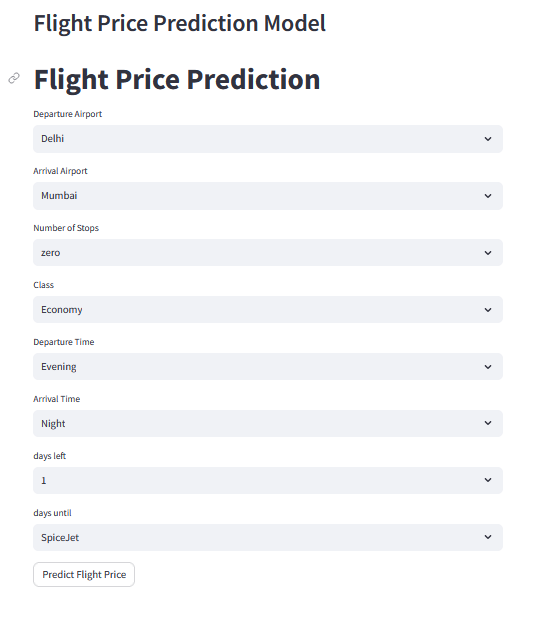